In [20]:
import numpy as np
import pandas as pd
import sklearn as datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ad = pd.read_csv('Advertising.csv')
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
ad1 = ad.drop('Unnamed: 0', axis = 'columns')
ad1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
ad1.isnull().any(axis=0)

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [23]:
ad1.loc[ad1.isnull().any(axis=1),:]

,TV,radio,newspaper,sales


,TV,radio,newspaper,sales


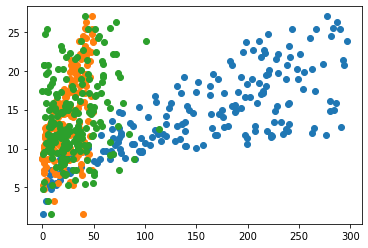

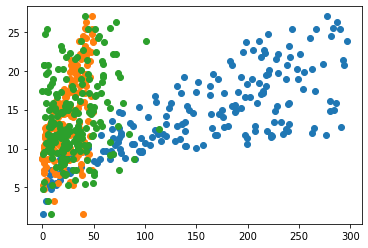

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
x = ad1[['TV', 'radio', 'newspaper']]
y = ad1['sales']
plt.plot(x, y, "o")
plt.show()

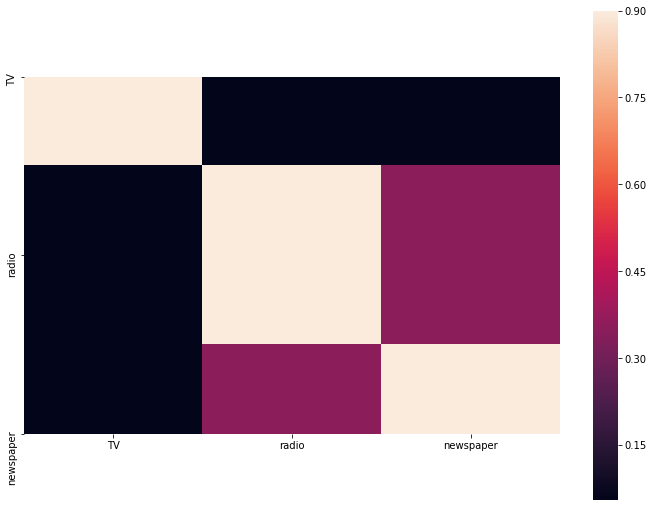

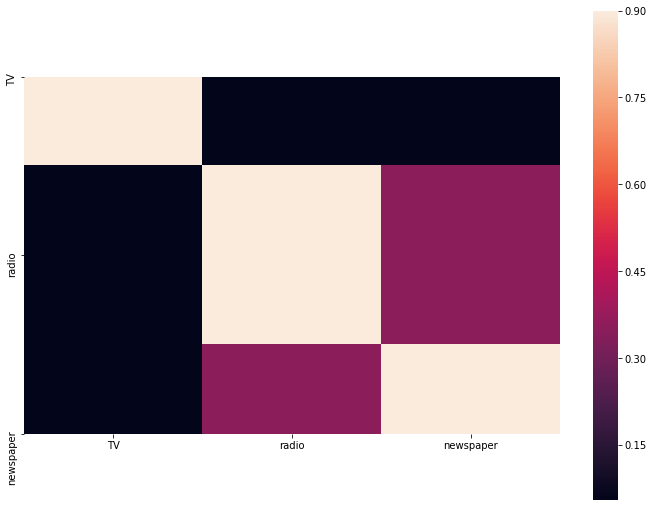

In [25]:
import seaborn as sns
X = ad1[['TV', 'radio', 'newspaper']]
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [26]:
ad1_std = ((ad1 - ad1.mean(0)) / ad1.std(0))
ad1_std.head()

,TV,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


,TV,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [27]:
ad1_ctl=ad1 - ad1.mean(0)
ad1_ctl.head()

,TV,radio,newspaper,sales
0,83.0575,14.536,38.646,8.0775
1,-102.5425,16.036,14.546,-3.6225
2,-129.8425,22.636,38.746,-4.7225
3,4.4575,18.036,27.946,4.4775
4,33.7575,-12.464,27.846,-1.1225


,TV,radio,newspaper,sales
0,83.0575,14.536,38.646,8.0775
1,-102.5425,16.036,14.546,-3.6225
2,-129.8425,22.636,38.746,-4.7225
3,4.4575,18.036,27.946,4.4775
4,33.7575,-12.464,27.846,-1.1225


In [28]:
X_std=ad1_std[['TV', 'radio', 'newspaper']]
Y_ctl=ad1_ctl['sales']

In [29]:
from sklearn.model_selection import train_test_split
X = ad1[['TV', 'radio', 'newspaper']]
Y = ad1['sales']
X_trainstd, X_teststd, y_trainctl, y_testctl = train_test_split(X_std, Y_ctl, test_size=0.2, random_state=42)

In [30]:
alphas = np.array([20,10,5,1,1e-2,1e-3,1e-4,1e-8,1e-10,1e-15])
model1 = Ridge()
grid1 = GridSearchCV(estimator=model1, param_grid=dict(alpha=alphas), cv=5)
grid1.fit(X_trainstd, y_trainctl)
print(grid1)
print(grid1.best_score_)
print(grid1.best_estimator_.alpha)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([2.e+01, 1.e+01, 5.e+00, 1.e+00, 1.e-02, 1.e-03, 1.e-04, 1.e-08,
       1.e-10, 1.e-15])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8596628001434379
1.0
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([2.e+01, 1.e+01, 5.e+00, 1.e+00, 1.e-02, 1.e-03, 1.e-04, 1.e-08,
       1.e-10, 1.e-15])},
   

In [31]:
ridge1 = Ridge(alpha=1.0)
ridge1.fit(X_trainstd, y_trainctl)
print ("R^2 for training set:"),
print (ridge1.score(X_trainstd, y_trainctl))

print ('-'*50)

print ("R^2 for test set: "),
print (ridge1.score(X_teststd, y_testctl))

print ('_'*50)

print ("Rss: %.2f" % np.sum((ridge1.predict(X_teststd) - y_testctl) ** 2))

R^2 for training set:
0.8956660080243806
--------------------------------------------------
R^2 for test set: 
0.898776512641748
__________________________________________________
Rss: 127.80
R^2 for training set:
0.8956660080243806
--------------------------------------------------
R^2 for test set: 
0.898776512641748
__________________________________________________
Rss: 127.80


In [32]:
ridge1.coef_

array([3.81630187, 2.78967101, 0.06810947])

array([3.81630187, 2.78967101, 0.06810947])

In [33]:
def get_form(model, colnames):
    result = pd.DataFrame(model.coef_).transpose()
    result.columns = colnames
    result['intercept'] = model.intercept_
    result = result.transpose()
    result.columns = ['coefficient']
    return result

In [34]:
colnames = ['TV', 'radio', 'newspaper']
get_form(ridge1, colnames)

,coefficient
TV,3.816302
radio,2.789671
newspaper,0.068109
intercept,0.020052


,coefficient
TV,3.816302
radio,2.789671
newspaper,0.068109
intercept,0.020052


In [35]:
from sklearn.linear_model import Lasso
alphas = np.array([20,10,5,1,1e-2,1e-3,1e-4,1e-8,1e-10,1e-15])
model2 = Lasso()
grid2 = GridSearchCV(estimator=model2, param_grid=dict(alpha=alphas),cv=5)
grid2.fit(X_trainstd, y_trainctl)
print(grid2)
print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([2.e+01, 1.e+01, 5.e+00, 1.e+00, 1.e-02, 1.e-03, 1.e-04, 1.e-08,
       1.e-10, 1.e-15])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8599454550284076
0.01
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False

In [36]:
lasso1 = Lasso(alpha=0.01)
lasso1.fit(X_trainstd, y_trainctl)
print ("R^2 for training set:"),
print (lasso1.score(X_trainstd, y_trainctl))

print ('-'*50)

print ("R^2 for test set:"),
print (lasso1.score(X_teststd, y_testctl))

print ('-'*50)

print ("RSS: %.2f" % np.sum((lasso1.predict(X_teststd) - y_testctl) ** 2))

R^2 for training set:
0.895691196348256
--------------------------------------------------
R^2 for test set:
0.8994574721120392
--------------------------------------------------
RSS: 126.94
R^2 for training set:
0.895691196348256
--------------------------------------------------
R^2 for test set:
0.8994574721120392
--------------------------------------------------
RSS: 126.94


In [37]:
get_form(lasso1, colnames)

,coefficient
TV,3.830300
radio,2.802563
newspaper,0.051436
intercept,0.019438


,coefficient
TV,3.830300
radio,2.802563
newspaper,0.051436
intercept,0.019438


In [38]:
# Lasso is better